In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.init as init
from torchsummary import summary

# Data

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ),(0.5, ))])

trainset = torchvision.datasets.CIFAR10(root='Data_CIFAF10',
                                        train=True,
                                        download=True,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=5,
                                          shuffle=True,
                                          drop_last = True)

testset = torchvision.datasets.CIFAR10(root='Data_CIFAR10',
                                       train=False,
                                       download=True,
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1024,
                                         num_workers=5,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


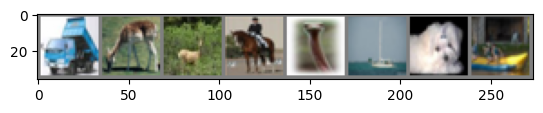

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img*0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

# Model

In [14]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(32*32*3, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                  [-1, 256]         786,688
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 256]          65,792
              ReLU-5                  [-1, 256]               0
            Linear-6                   [-1, 10]           2,570
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 3.26
Estimated Total Size (MB): 3.30
----------------------------------------------------------------


# Loss, Optimizer and Evaluate Function

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),
                       lr=0.01)

In [16]:
def evalute(model, testloader, loss_fn):
    model.eval()
    test_loss = 0.0
    running_correct = 0.0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()
    
    accuracy = running_correct *100 / total
    loss = test_loss / len(testloader)
    return loss, accuracy

# Train

In [17]:
train_losses = []
train_accuracies = []

test_losses = []
test_accuracies = []

max_epoch = 20

In [18]:
for epoch in  range(max_epoch):
    model.train()
    running_loss = 0.0
    running_correct = 0.0
    total = 0

    for i, (images, labels ) in enumerate(trainloader, 0):

        outputs = model(images)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_accuracy = running_correct * 100 / total
    epoch_loss = running_loss / (i+1)
    train_accuracies.append(epoch_accuracy)
    train_losses.append(epoch_loss)

    test_loss, test_accuracy = evalute(model, testloader, loss_fn)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/20], Loss: 2.3212, Accuracy: 27.08%, Test Loss: 1.7951, Test Accuracy: 35.80%
Epoch [2/20], Loss: 1.7056, Accuracy: 38.63%, Test Loss: 1.6475, Test Accuracy: 41.22%
Epoch [3/20], Loss: 1.5724, Accuracy: 43.87%, Test Loss: 1.5444, Test Accuracy: 45.47%
Epoch [4/20], Loss: 1.4780, Accuracy: 47.61%, Test Loss: 1.5057, Test Accuracy: 47.35%
Epoch [5/20], Loss: 1.4096, Accuracy: 49.93%, Test Loss: 1.4801, Test Accuracy: 48.21%
Epoch [6/20], Loss: 1.3440, Accuracy: 52.15%, Test Loss: 1.4584, Test Accuracy: 49.06%
Epoch [7/20], Loss: 1.3070, Accuracy: 53.62%, Test Loss: 1.4325, Test Accuracy: 50.09%
Epoch [8/20], Loss: 1.2572, Accuracy: 55.64%, Test Loss: 1.4533, Test Accuracy: 49.23%
Epoch [9/20], Loss: 1.2035, Accuracy: 57.36%, Test Loss: 1.4527, Test Accuracy: 50.15%
Epoch [10/20], Loss: 1.1738, Accuracy: 58.40%, Test Loss: 1.4445, Test Accuracy: 50.51%
Epoch [11/20], Loss: 1.1370, Accuracy: 59.72%, Test Loss: 1.4645, Test Accuracy: 49.63%
Epoch [12/20], Loss: 1.0982, Accuracy: 61

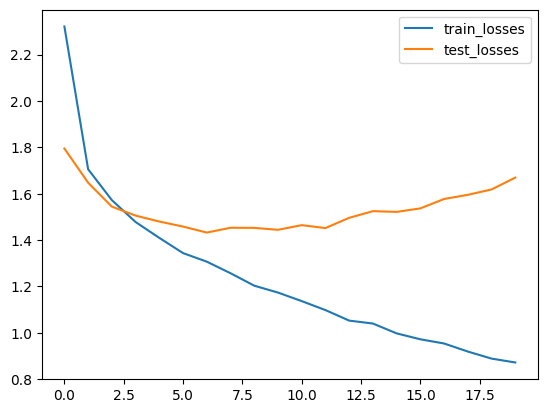

In [19]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

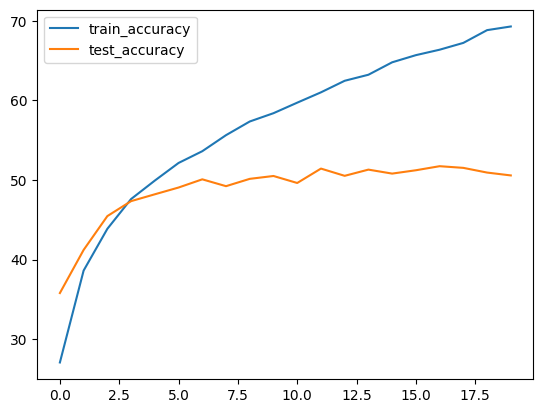

In [20]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()